
🔹 Accuracy: 0.97


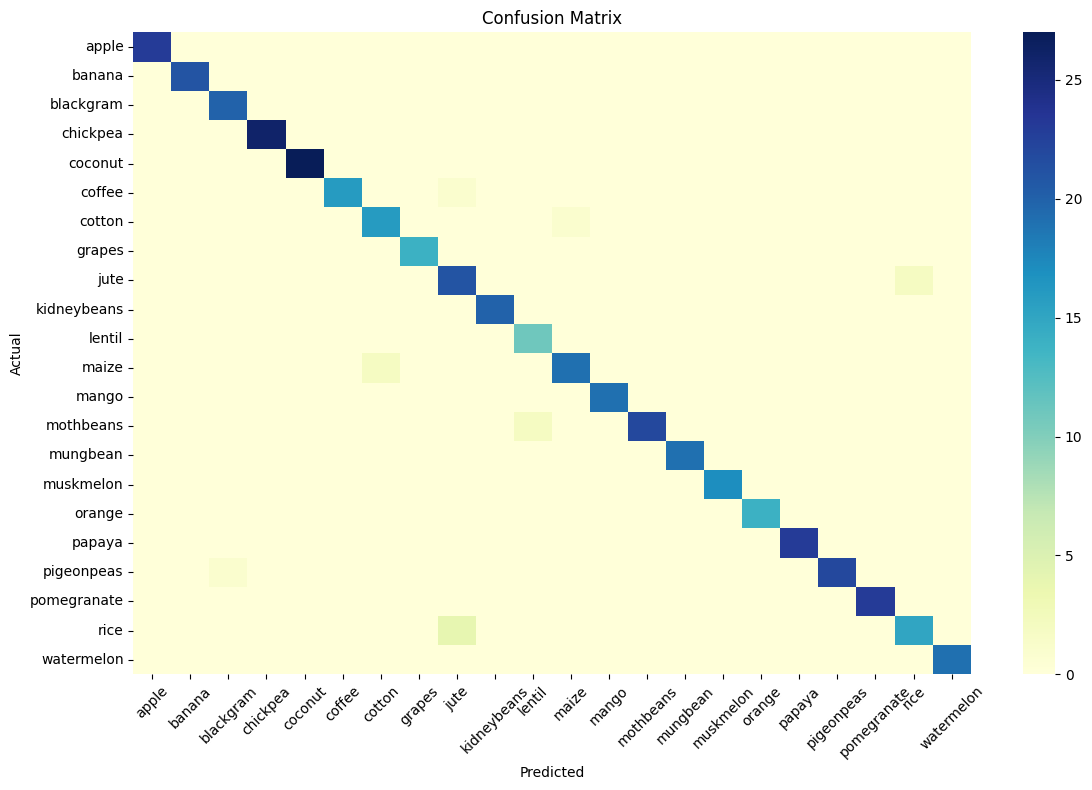


🔹 Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.89      0.94      0.91        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.91      0.86        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       0.95      0.90      0.93        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14


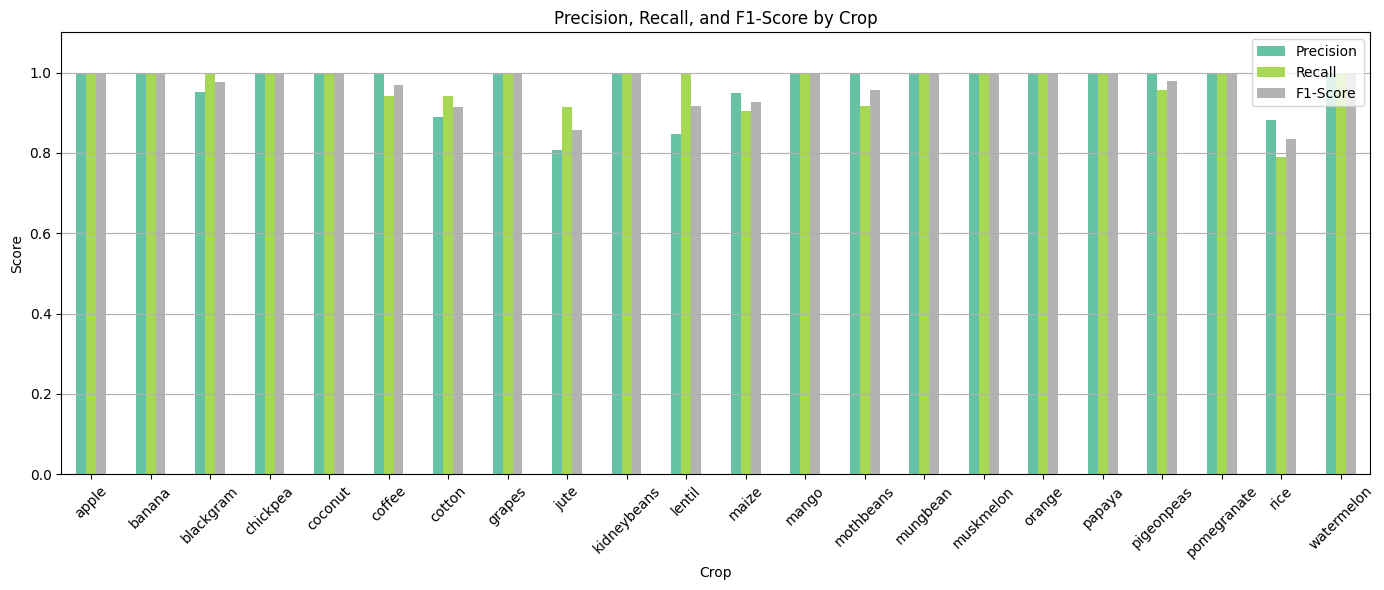

['smart-agriculture.joblib']

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_recall_fscore_support
)

# Load data
df = pd.read_csv('Crop_recommendation.csv')

# Features and target
X = df[['N', 'K', 'P', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'\n🔹 Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap='YlGnBu', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=knn.classes_))

# Precision, Recall, F1-score bar chart
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=knn.classes_)
metrics_df = pd.DataFrame({
    'Crop': knn.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

metrics_df.set_index('Crop', inplace=True)
metrics_df.plot(kind='bar', figsize=(14, 6), colormap='Set2')
plt.title("Precision, Recall, and F1-Score by Crop")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save model
joblib.dump(knn, 'smart-agriculture.joblib')
